Using backend: tensorflow.compat.v1

2021-12-13 14:27:46.216729: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
non-resource variables are not supported in the long term




heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0002 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0072 seconds


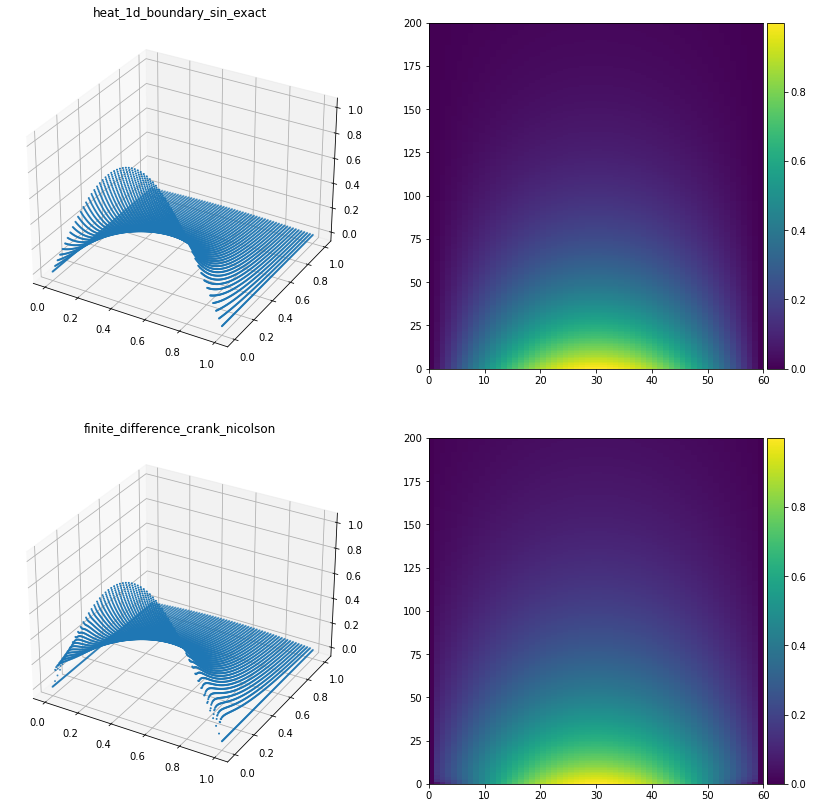

In [1]:
from heat_pinn import *

TIMER_REPEAT_TIMES = 25

# Generate constants throughout this app!!
const_params = PinnConstParam()
solve_analytical_and_numerical(const_params)
plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)


# Test 1: Default parameters from DeepXde

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


train_bc_points shape (240, 2)
train_points shape (2780, 2)
train_next_batch shape (3020, 2)


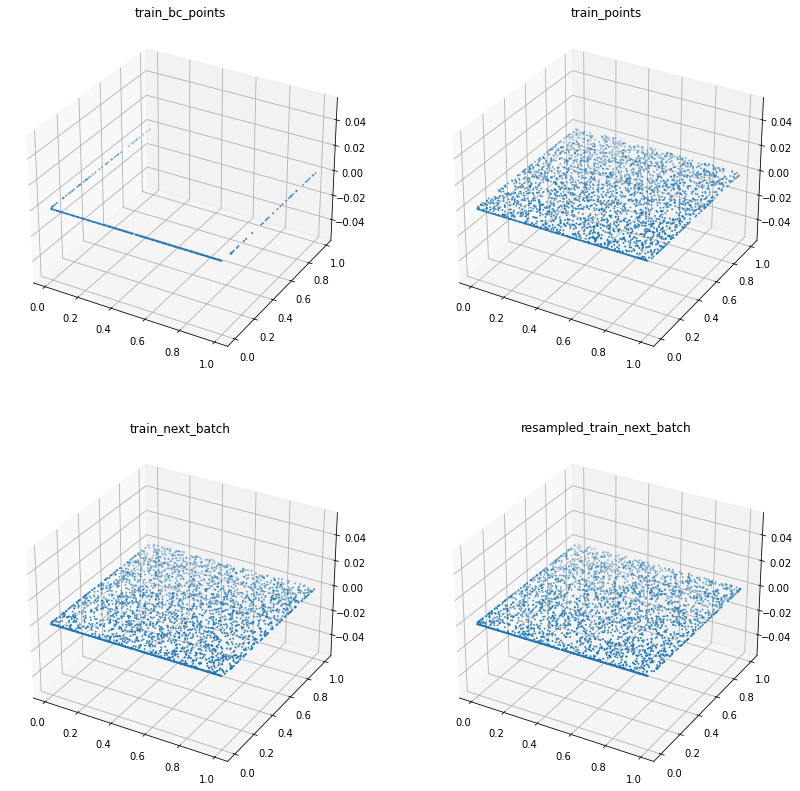

In [2]:
# Create model and plot training data
test_params = PinnTestParam()
geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.047083 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 14:27:49.146475: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-13 14:27:49.147449: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-13 14:27:49.174146: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: un

'compile' took 0.251673 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.88e-02, 6.62e-03, 5.87e-01]    [1.86e-02, 6.62e-03, 5.87e-01]    []  


2021-12-13 14:27:49.354459: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-13 14:27:49.361111: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593190000 Hz


1000      [1.41e-03, 8.11e-04, 4.48e-04]    [9.31e-04, 8.11e-04, 4.48e-04]    []  
2000      [2.16e-04, 2.07e-05, 2.61e-05]    [1.48e-04, 2.07e-05, 2.61e-05]    []  
3000      [8.58e-05, 4.21e-06, 1.06e-05]    [6.33e-05, 4.21e-06, 1.06e-05]    []  
4000      [4.89e-05, 2.54e-06, 6.08e-06]    [3.53e-05, 2.54e-06, 6.08e-06]    []  
5000      [3.12e-05, 1.28e-06, 3.39e-06]    [2.18e-05, 1.28e-06, 3.39e-06]    []  
6000      [2.22e-05, 6.08e-07, 1.93e-06]    [1.56e-05, 6.08e-07, 1.93e-06]    []  
7000      [1.85e-05, 1.98e-06, 6.03e-06]    [1.26e-05, 1.98e-06, 6.03e-06]    []  
8000      [1.37e-05, 1.88e-07, 7.53e-07]    [9.88e-06, 1.88e-07, 7.53e-07]    []  
9000      [1.13e-05, 1.63e-07, 6.42e-07]    [8.40e-06, 1.63e-07, 6.42e-07]    []  
10000     [1.71e-05, 6.75e-06, 6.03e-06]    [1.25e-05, 6.75e-06, 6.03e-06]    []  
11000     [9.53e-06, 2.50e-06, 3.30e-06]    [7.08e-06, 2.50e-06, 3.30e-06]    []  
12000     [7.45e-06, 9.41e-08, 2.25e-07]    [5.70e-06, 9.41e-08, 2.25e-07]    []  
1300

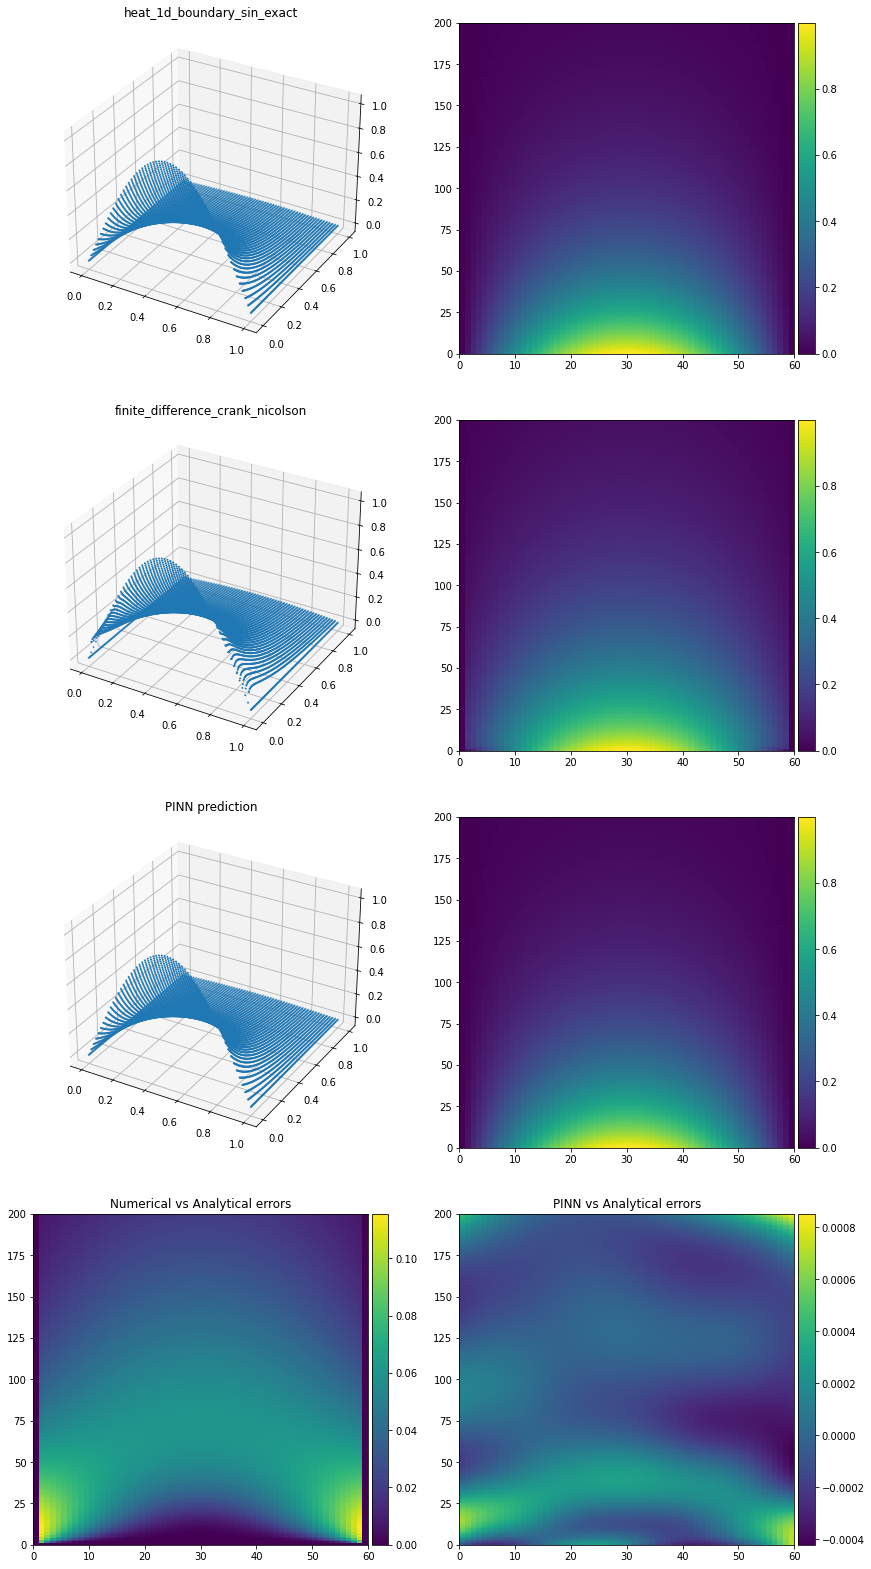

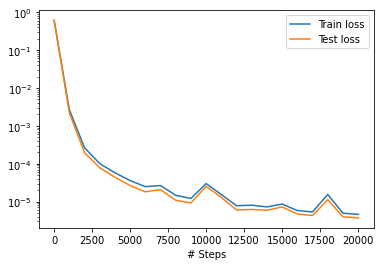

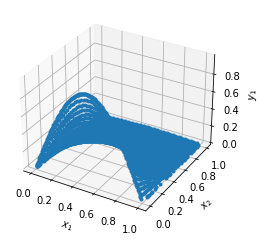

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  0.03987500843487987
Mean squared error:  0.0020459501475140825
Max error:  0.11549116080982058
--- PINN vs Analytical Report ---
Mean absolute error:  0.0001341646254921252
Mean squared error:  2.997766822345865e-08
Max error:  0.0008516039233654714
Mean residual: 0.33793503
L2 relative error: 0.0006888600194210818
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [3]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 2: Reduce hidden layers and size to break solution

In [4]:
test_params = PinnTestParam()
test_params.nn_hidden_layer_num = 1
test_params.nn_hidden_layer_size = 5

geomtime_data, model = create_model(const_params, test_params)

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


Compiling model...
Building feed-forward neural network...
'build' took 0.016427 s

'compile' took 0.124985 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 14:28:55.884708: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.03e-01, 2.15e-01, 2.08e-01]    [1.02e-01, 2.15e-01, 2.08e-01]    []  
1000      [1.14e-02, 3.44e-02, 6.80e-02]    [9.18e-03, 3.44e-02, 6.80e-02]    []  
2000      [6.82e-03, 2.96e-02, 4.28e-02]    [5.62e-03, 2.96e-02, 4.28e-02]    []  
3000      [5.29e-03, 2.11e-02, 3.23e-02]    [4.37e-03, 2.11e-02, 3.23e-02]    []  
4000      [6.22e-03, 1.23e-02, 2.00e-02]    [5.07e-03, 1.23e-02, 2.00e-02]    []  
5000      [9.46e-03, 7.04e-03, 1.37e-02]    [7.75e-03, 7.04e-03, 1.37e-02]    []  
6000      [1.13e-02, 4.98e-03, 1.12e-02]    [9.46e-03, 4.98e-03, 1.12e-02]    []  
7000      [1.18e-02, 4.22e-03, 1.01e-02]    [9.88e-03, 4.22e-03, 1.01e-02]    []  
8000      [1.12e-02, 4.08e-03, 9.52e-03]    [9.27e-03, 4.08e-03, 9.52e-03]    []  
9000      [1.06e-02, 4.14e-03, 8.80e-03]    [8.59e-03, 4.14e-03, 8.80e-03]    []  
10000     [1.04e-02, 4.11e-03, 8.32

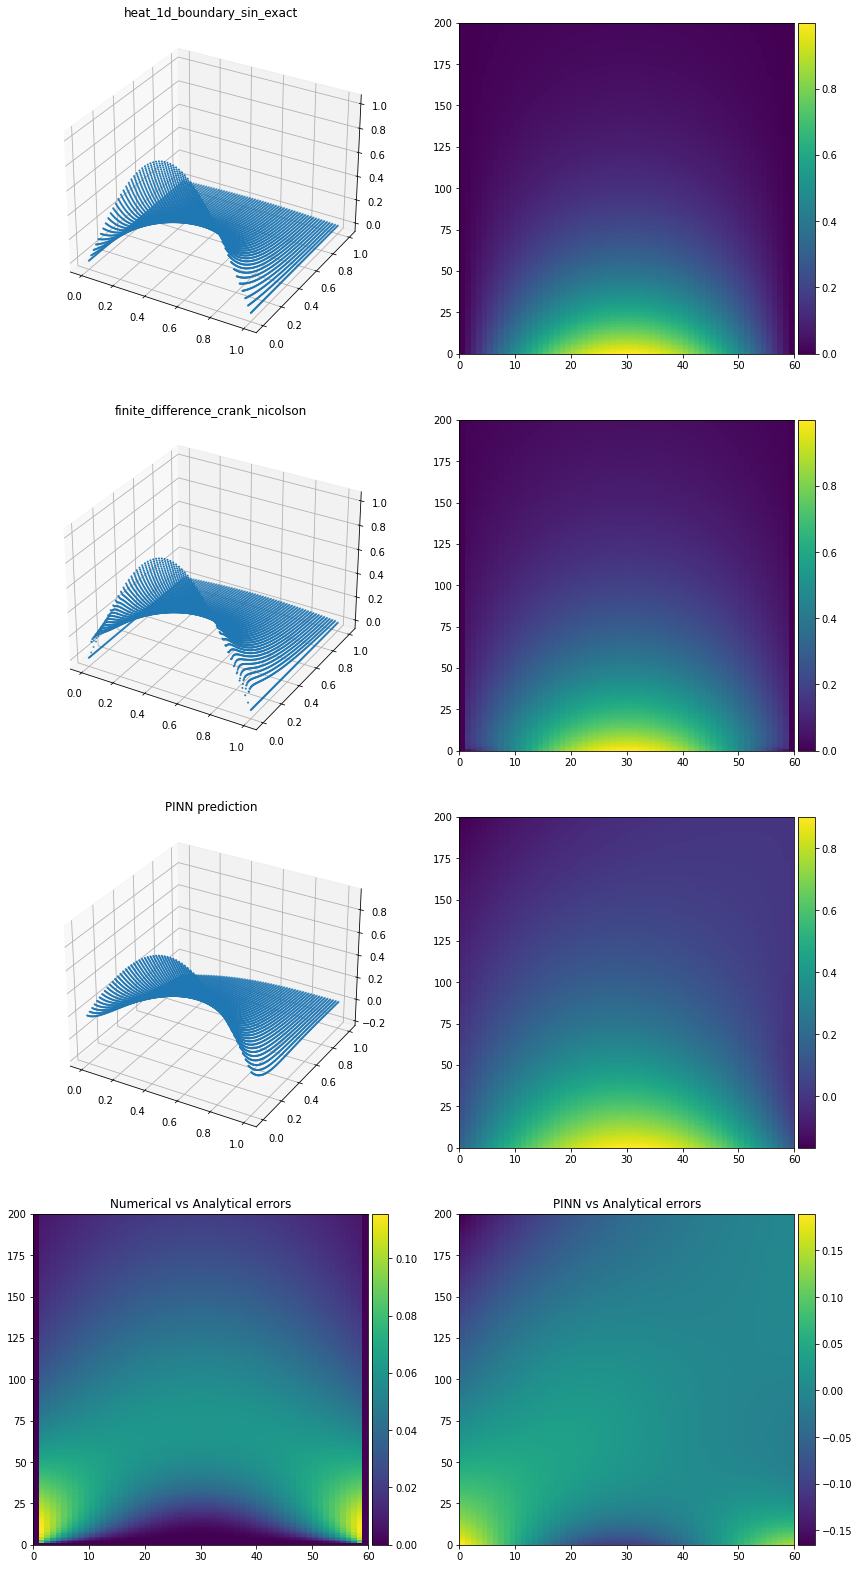

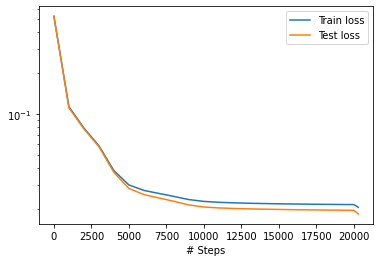

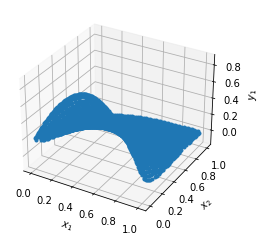

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  0.03987500843487987
Mean squared error:  0.0020459501475140825
Max error:  0.11549116080982058
--- PINN vs Analytical Report ---
Mean absolute error:  0.027326241068840792
Mean squared error:  0.0016676829896765894
Max error:  0.18908488750457764
Mean residual: 0.39131373
L2 relative error: 0.16247584514053
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 5
nn_hidden_layer_num: 1



In [5]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 3: Reduce boundary points to break solution

train_bc_points shape (6, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+5=5. 
  warnings.warn("The balance properties of Sobol' points require "


train_points shape (2546, 2)
train_next_batch shape (2552, 2)


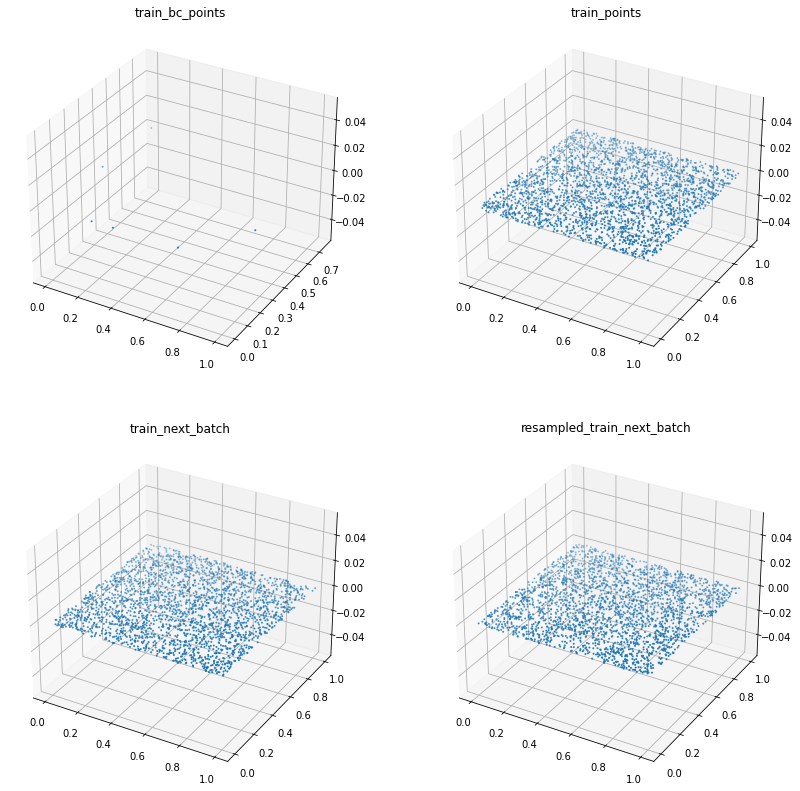

In [6]:
test_params = PinnTestParam()
test_params.d_num_boundary = 3
test_params.d_num_initial = 3

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.026552 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 14:29:14.919069: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.223035 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.38e-01, 1.63e-01, 2.78e-01]    [1.36e-01, 1.63e-01, 2.78e-01]    []  
1000      [5.77e-04, 1.94e-05, 1.70e-03]    [4.67e-04, 1.94e-05, 1.70e-03]    []  
2000      [1.71e-04, 1.51e-05, 1.32e-03]    [1.35e-04, 1.51e-05, 1.32e-03]    []  
3000      [1.16e-04, 1.56e-05, 5.63e-04]    [8.29e-05, 1.56e-05, 5.63e-04]    []  
4000      [3.13e-04, 5.37e-05, 1.74e-04]    [2.84e-04, 5.37e-05, 1.74e-04]    []  
5000      [7.27e-05, 8.58e-06, 4.91e-05]    [5.61e-05, 8.58e-06, 4.91e-05]    []  
6000      [3.99e-05, 3.57e-07, 9.85e-06]    [3.26e-05, 3.57e-07, 9.85e-06]    []  
7000      [2.56e-05, 2.82e-07, 2.97e-06]    [2.17e-05, 2.82e-07, 2.97e-06]    []  
8000      [2.47e-05, 2.98e-05, 5.81e-05]    [2.19e-05, 2.98e-05, 5.81e-05]    []  
9000      [1.74e-05, 6.76e-07, 1.19e-06]    [1.50e-05, 6.76e-07, 1.19e-06]    []  
10000   

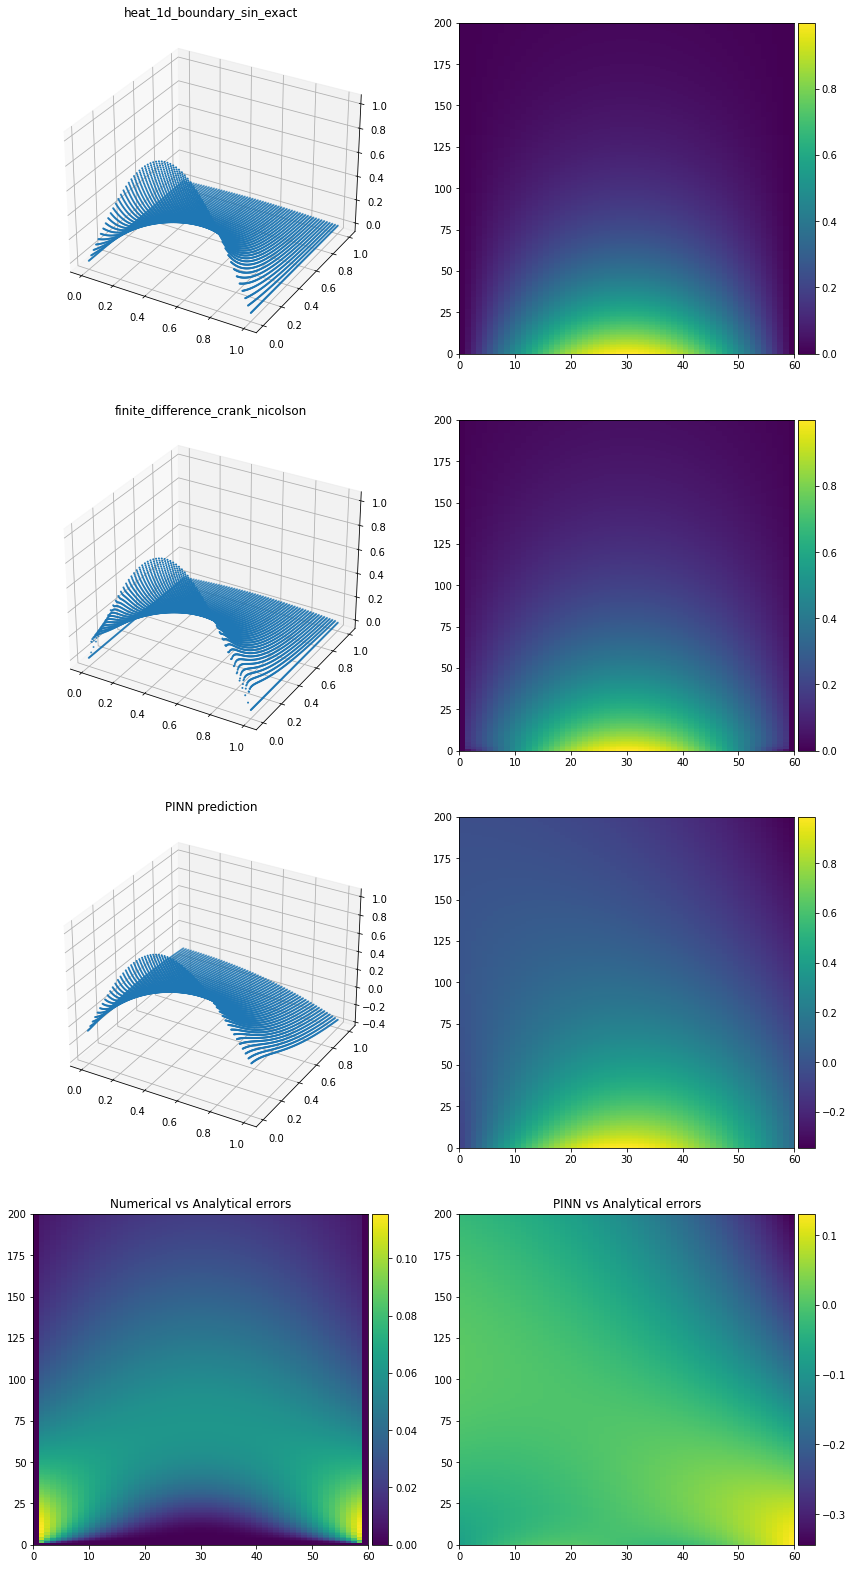

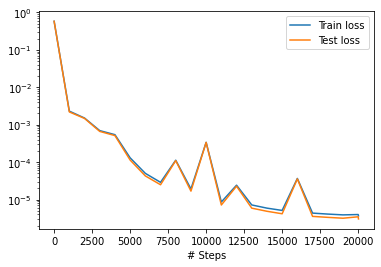

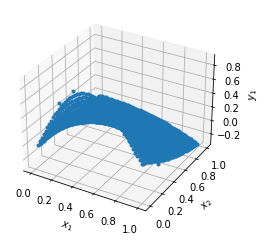

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  0.03987500843487987
Mean squared error:  0.0020459501475140825
Max error:  0.11549116080982058
--- PINN vs Analytical Report ---
Mean absolute error:  0.056623071487046255
Mean squared error:  0.0078842612346952
Max error:  0.34383195638656616
Mean residual: 0.45494774
L2 relative error: 0.35327471768674035
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 3
d_num_initial: 3
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [7]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)

# Test 4: Reduce domain to break solution

train_bc_points shape (240, 2)
train_points shape (290, 2)
train_next_batch shape (530, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


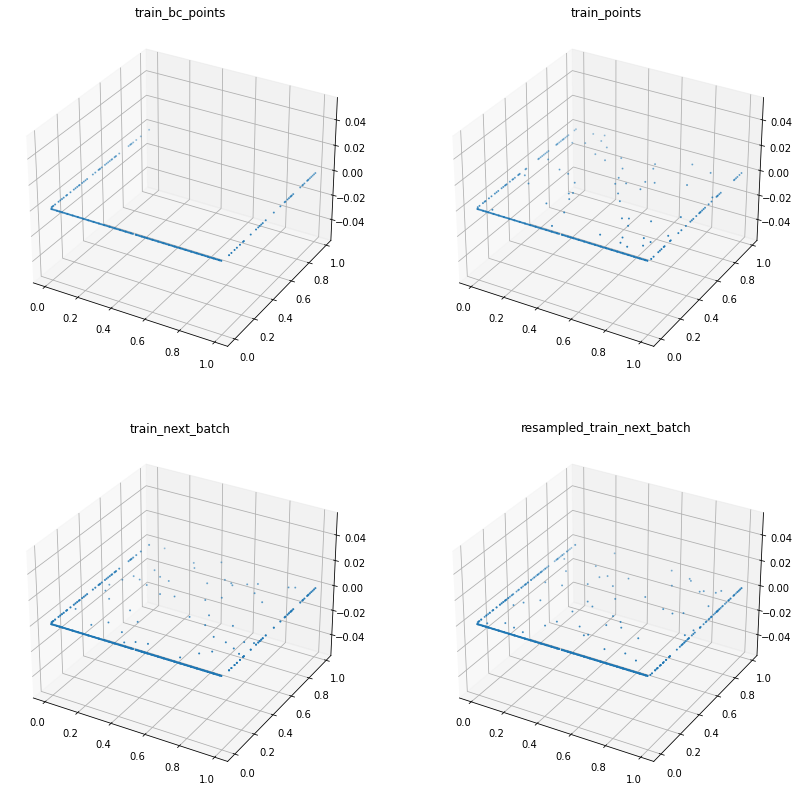

In [8]:
test_params = PinnTestParam()
test_params.d_num_domain = 50

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.038224 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 14:30:12.077643: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.250831 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.01e-03, 6.26e-03, 4.30e-01]    [7.91e-03, 6.26e-03, 4.30e-01]    []  
1000      [1.43e-03, 9.18e-04, 5.49e-04]    [2.78e-03, 9.18e-04, 5.49e-04]    []  
2000      [4.48e-04, 9.03e-05, 5.41e-05]    [1.04e-03, 9.03e-05, 5.41e-05]    []  
3000      [1.66e-04, 6.58e-06, 1.67e-05]    [5.69e-04, 6.58e-06, 1.67e-05]    []  
4000      [6.75e-05, 3.52e-06, 9.24e-06]    [2.91e-04, 3.52e-06, 9.24e-06]    []  
5000      [3.30e-05, 3.19e-06, 3.66e-06]    [1.78e-04, 3.19e-06, 3.66e-06]    []  
6000      [2.53e-05, 3.19e-06, 2.15e-06]    [1.32e-04, 3.19e-06, 2.15e-06]    []  
7000      [2.02e-05, 3.88e-06, 4.25e-06]    [1.10e-04, 3.88e-06, 4.25e-06]    []  
8000      [1.50e-05, 2.22e-06, 9.15e-07]    [8.95e-05, 2.22e-06, 9.15e-07]    []  
9000      [1.42e-05, 2.02e-06, 9.20e-07]    [8.17e-05, 2.02e-06, 9.20e-07]    []  
10000   

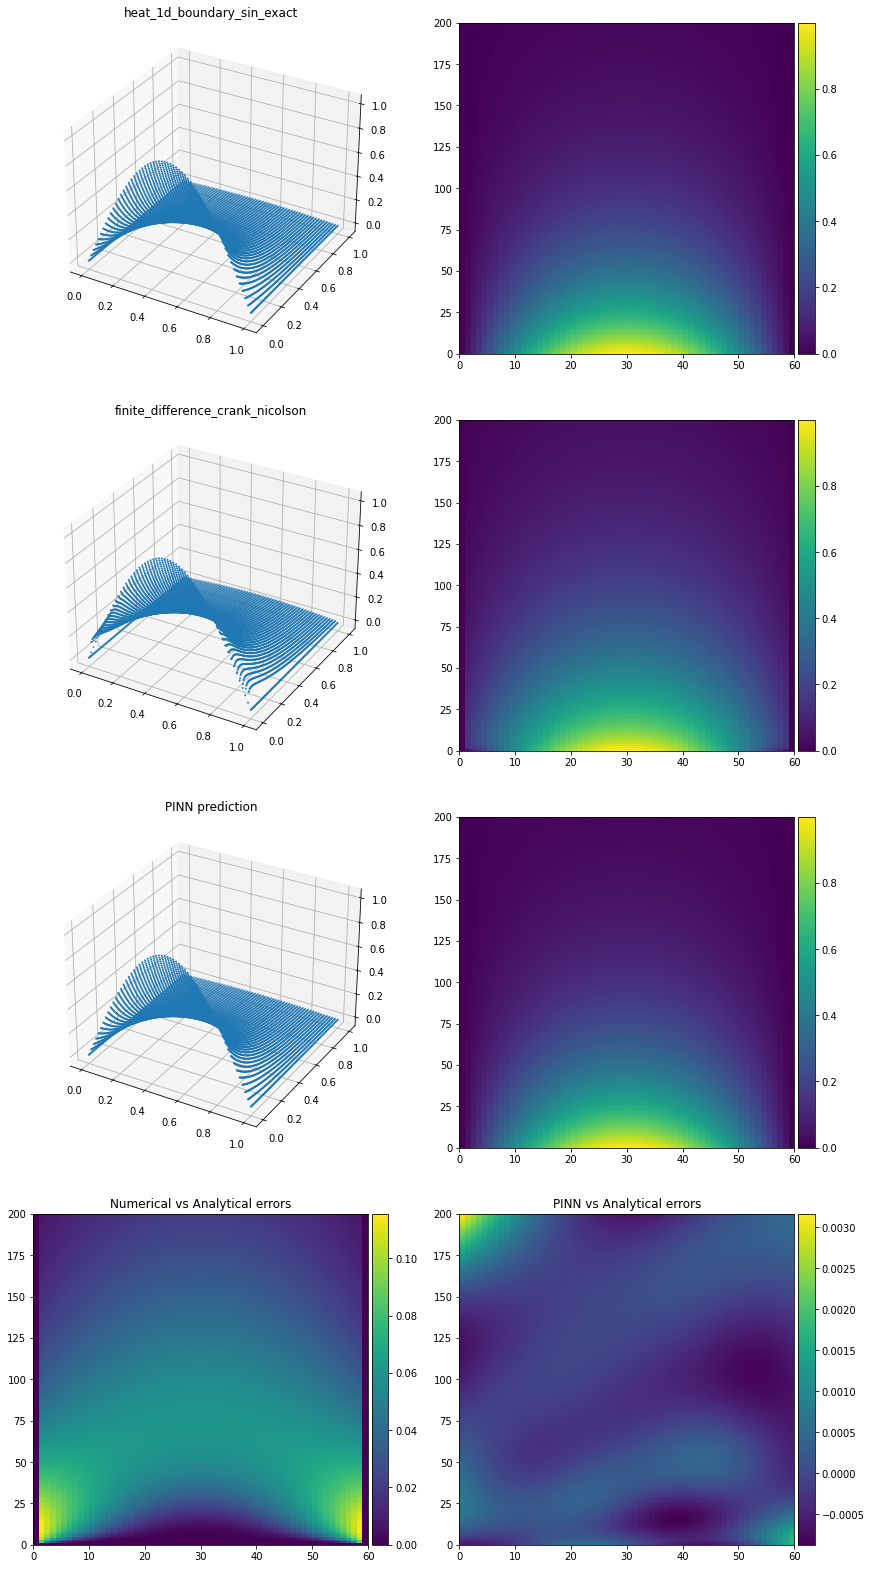

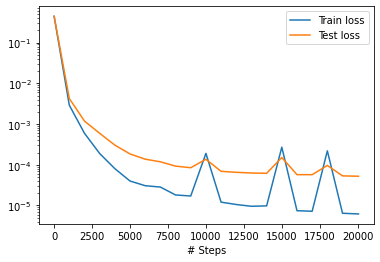

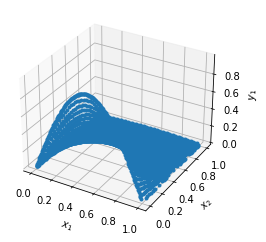

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  0.03987500843487987
Mean squared error:  0.0020459501475140825
Max error:  0.11549116080982058
--- PINN vs Analytical Report ---
Mean absolute error:  0.0002859264921153129
Mean squared error:  1.6315729715635974e-07
Max error:  0.0031639039516448975
Mean residual: 0.33672842
L2 relative error: 0.0016070718958760618
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 50
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [9]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 5: Reduce train data (domain and bc) to break solution

train_bc_points shape (20, 2)
train_points shape (25, 2)
train_next_batch shape (45, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "


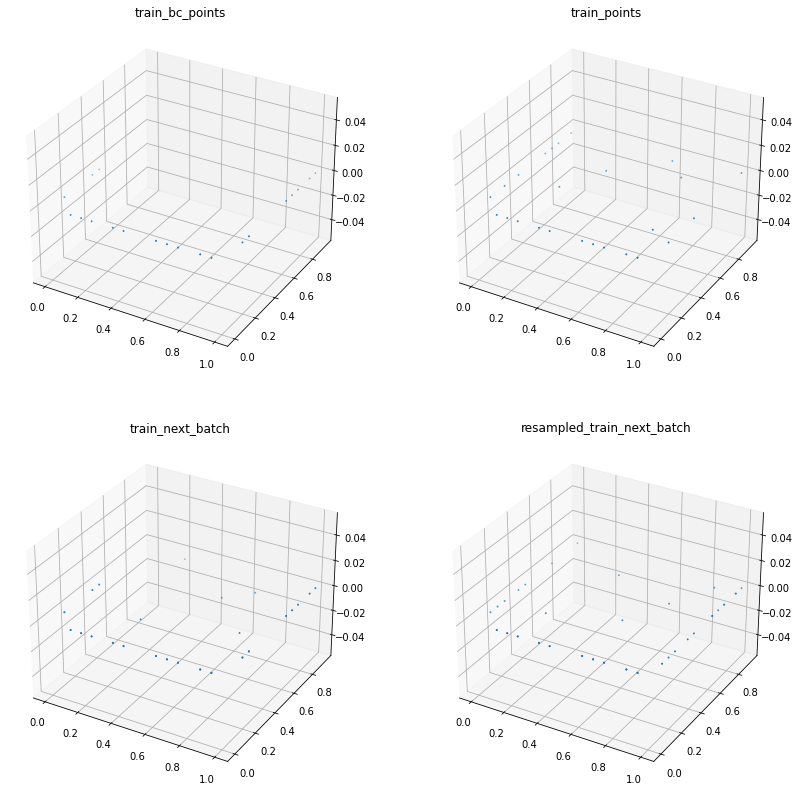

In [10]:
test_params = PinnTestParam()
test_params.d_num_domain = 5
test_params.d_num_boundary = 10
test_params.d_num_initial = 10

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.041627 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 14:30:36.736596: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.255710 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.28e-01, 2.36e-01, 5.32e-01]    [6.75e-01, 2.36e-01, 5.32e-01]    []  
1000      [1.73e-03, 3.85e-03, 5.12e-03]    [2.77e-02, 3.85e-03, 5.12e-03]    []  
2000      [1.17e-04, 1.50e-04, 2.70e-04]    [1.09e-01, 1.50e-04, 2.70e-04]    []  
3000      [6.64e-05, 5.73e-05, 1.12e-04]    [9.88e-02, 5.73e-05, 1.12e-04]    []  
4000      [3.52e-05, 3.88e-05, 6.47e-05]    [7.22e-02, 3.88e-05, 6.47e-05]    []  
5000      [1.80e-05, 2.52e-05, 3.77e-05]    [6.06e-02, 2.52e-05, 3.77e-05]    []  
6000      [2.00e-05, 1.55e-05, 2.07e-05]    [5.63e-02, 1.55e-05, 2.07e-05]    []  
7000      [6.80e-06, 8.89e-06, 1.10e-05]    [5.58e-02, 8.89e-06, 1.10e-05]    []  
8000      [1.85e-05, 7.45e-06, 5.63e-06]    [5.56e-02, 7.45e-06, 5.63e-06]    []  
9000      [2.02e-06, 4.47e-06, 2.98e-06]    [5.59e-02, 4.47e-06, 2.98e-06]    []  
10000   

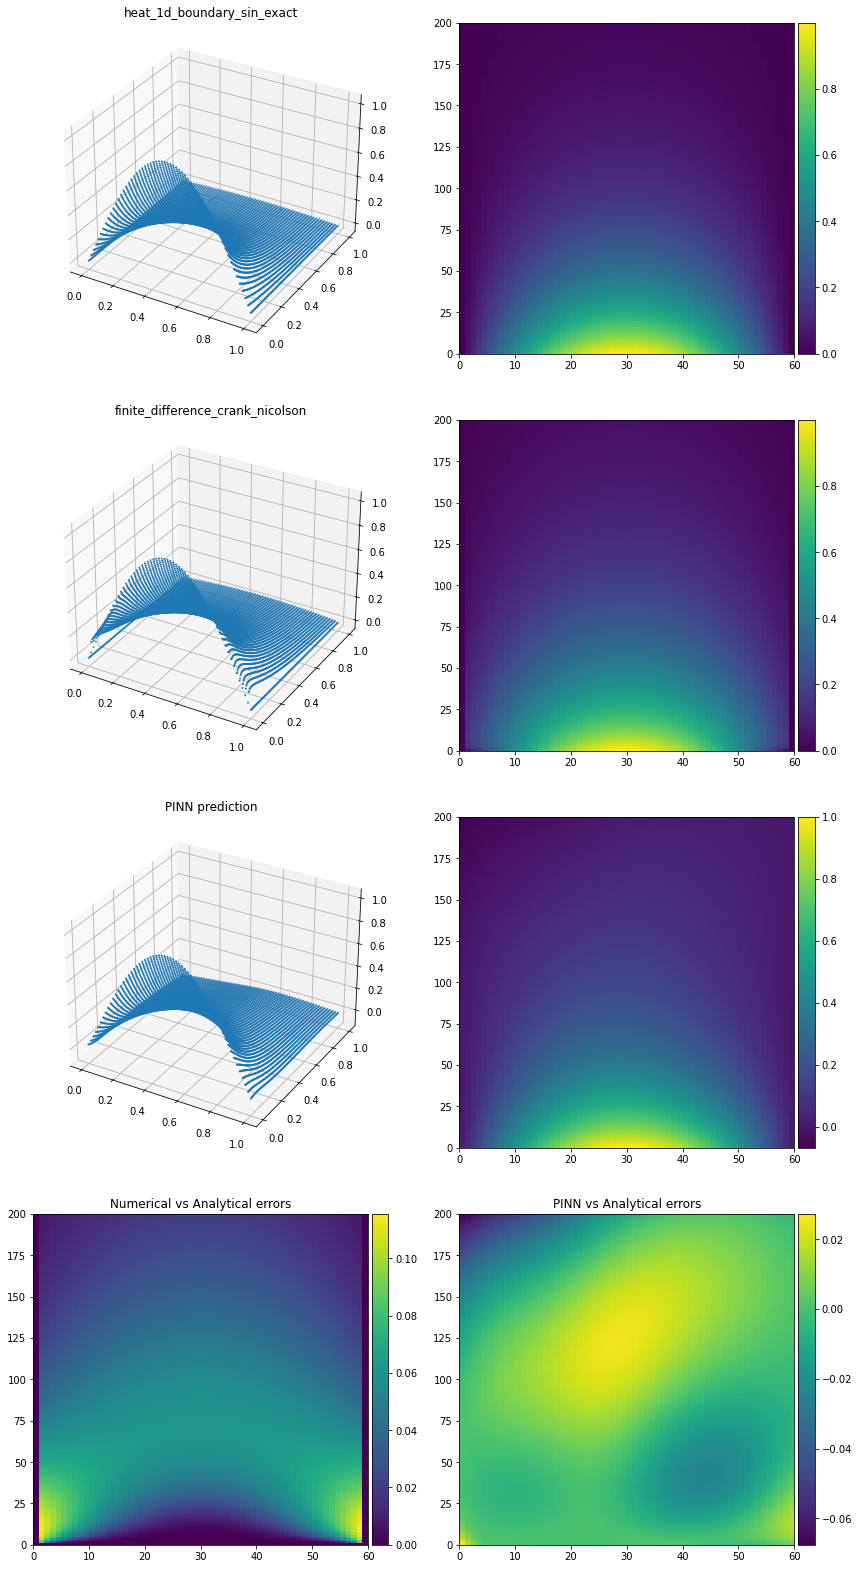

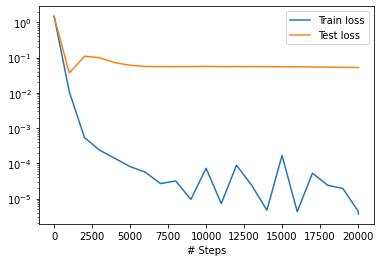

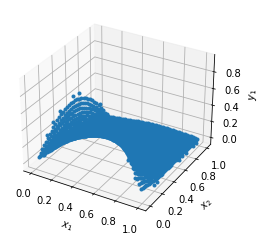

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  0.03987500843487987
Mean squared error:  0.0020459501475140825
Max error:  0.11549116080982058
--- PINN vs Analytical Report ---
Mean absolute error:  0.01070387099185966
Mean squared error:  0.00020640812286946874
Max error:  0.06754396855831146
Mean residual: 0.3838326
L2 relative error: 0.057160424753420244
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 5
d_num_boundary: 10
d_num_initial: 10
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [11]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)
